# IHSG Analysis
This notebook does an analysis on IHSG closing price trends and see what kind of factors affect these trends. The IHSG (Indeks Harga Saham Gabungan), also known as the Jakarta Composite Index (JCI), is the main stock market index in Indonesia. It tracks the performance of all listed companies on the Indonesia Stock Exchange (IDX). IHSG is important as it shows the overall condition of the Indonesian stock market for foreign investors and thus would be the baseline for them whether to invest in Indonesia or not.

## Import Libraries

In [3]:
#Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import finance analysis libraries
import yfinance as yf
import requests

In [5]:
from yahoo_fin.stock_info import get_data

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
plt.style.available
plt.style.use('ggplot')

In [8]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

## Data Collection and Preparation
Collect data from Yahoo Finance API using the ticker "^JKSE". We will analyze using 5 years of daily data, starting from 2019 to 2024.

In [10]:
#We'll get the data for 5 years starting from the first day on 2019 until 2024
jkse = yf.Ticker("^JKSE")
ihsg_data = jkse.history(start="2019-01-01", end="2024-12-31", interval="1d")
ihsg_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00+07:00,6197.871094,6205.895020,6164.833984,6181.174805,52797800,0.0,0.0
2019-01-03 00:00:00+07:00,6176.151855,6221.009766,6176.151855,6221.009766,72166700,0.0,0.0
2019-01-04 00:00:00+07:00,6211.096191,6274.540039,6200.854004,6274.540039,80858100,0.0,0.0
2019-01-07 00:00:00+07:00,6317.625977,6354.757812,6287.224121,6287.224121,90278300,0.0,0.0
2019-01-08 00:00:00+07:00,6292.263184,6316.240234,6251.375977,6262.847168,90537400,0.0,0.0


In [11]:
ihsg_data.duplicated().sum()

0

In [12]:
ihsg_data.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [13]:
#Add a feature of Price Changes in percentage
ihsg_data['CloseChanges'] = ihsg_data['Close'].pct_change()
ihsg_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CloseChanges
Date,,,,,,,,
2019-01-02 00:00:00+07:00,6197.871094,6205.895020,6164.833984,6181.174805,52797800,0.0,0.0,NaN
2019-01-03 00:00:00+07:00,6176.151855,6221.009766,6176.151855,6221.009766,72166700,0.0,0.0,0.006445
2019-01-04 00:00:00+07:00,6211.096191,6274.540039,6200.854004,6274.540039,80858100,0.0,0.0,0.008605
2019-01-07 00:00:00+07:00,6317.625977,6354.757812,6287.224121,6287.224121,90278300,0.0,0.0,0.002022
2019-01-08 00:00:00+07:00,6292.263184,6316.240234,6251.375977,6262.847168,90537400,0.0,0.0,-0.003877


In [14]:
ihsg_data.index = pd.to_datetime(ihsg_data.index, format='%Y-%m-%d')
ihsg_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CloseChanges
Date,,,,,,,,
2019-01-02 00:00:00+07:00,6197.871094,6205.895020,6164.833984,6181.174805,52797800,0.0,0.0,NaN
2019-01-03 00:00:00+07:00,6176.151855,6221.009766,6176.151855,6221.009766,72166700,0.0,0.0,0.006445
2019-01-04 00:00:00+07:00,6211.096191,6274.540039,6200.854004,6274.540039,80858100,0.0,0.0,0.008605
2019-01-07 00:00:00+07:00,6317.625977,6354.757812,6287.224121,6287.224121,90278300,0.0,0.0,0.002022
2019-01-08 00:00:00+07:00,6292.263184,6316.240234,6251.375977,6262.847168,90537400,0.0,0.0,-0.003877
...,...,...,...,...,...,...,...,...
2024-10-14 00:00:00+07:00,7518.812988,7570.267090,7518.812988,7559.654785,205872100,0.0,0.0,0.005193
2024-10-15 00:00:00+07:00,7579.045898,7635.043945,7573.452148,7626.951172,218732600,0.0,0.0,0.008902
2024-10-16 00:00:00+07:00,7645.211914,7658.397949,7616.604004,7648.939941,197424300,0.0,0.0,0.002883


In [15]:
ihsg_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1408 entries, 2019-01-02 00:00:00+07:00 to 2024-10-18 00:00:00+07:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1408 non-null   float64
 1   High          1408 non-null   float64
 2   Low           1408 non-null   float64
 3   Close         1408 non-null   float64
 4   Volume        1408 non-null   int64  
 5   Dividends     1408 non-null   float64
 6   Stock Splits  1408 non-null   float64
 7   CloseChanges  1407 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 99.0 KB


## Exploratory Data Analysis
Plotting the daily Closing Price changes along with other features that might correlate with the Closing Price to view any trends

### IHSG Closing Price and volume traded

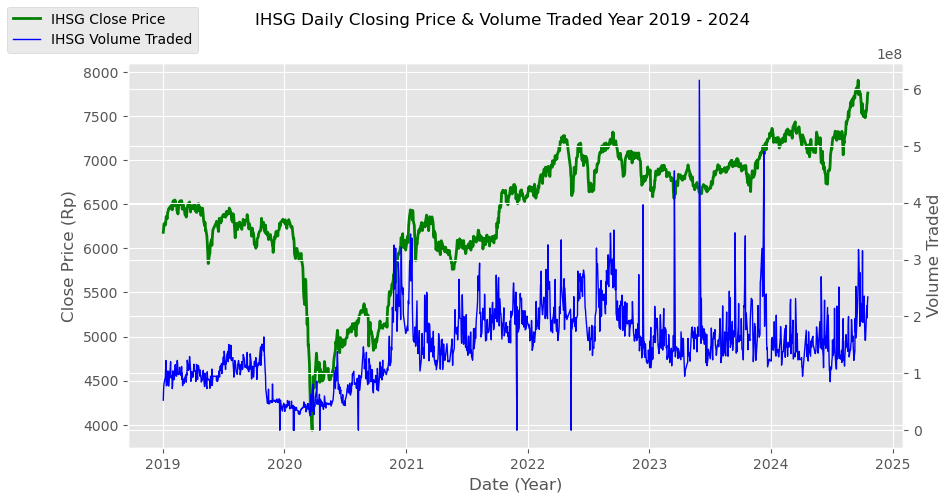

In [18]:
#Plot IHSG Closing Price and volume traded to view it's trend

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(ihsg_data.index, ihsg_data['Close'], color="green", linewidth=2, label='IHSG Close Price')
ax1.set_xlabel('Date (Year)')
ax1.set_ylabel('Close Price (Rp)')

ax2 = ax1.twinx()
ax2.plot(ihsg_data.index, ihsg_data['Volume'], color="blue", linewidth=1, label='IHSG Volume Traded')
ax2.set_ylabel('Volume Traded')

fig.suptitle("IHSG Daily Closing Price & Volume Traded Year 2019 - 2024")
fig.legend(loc='upper left')

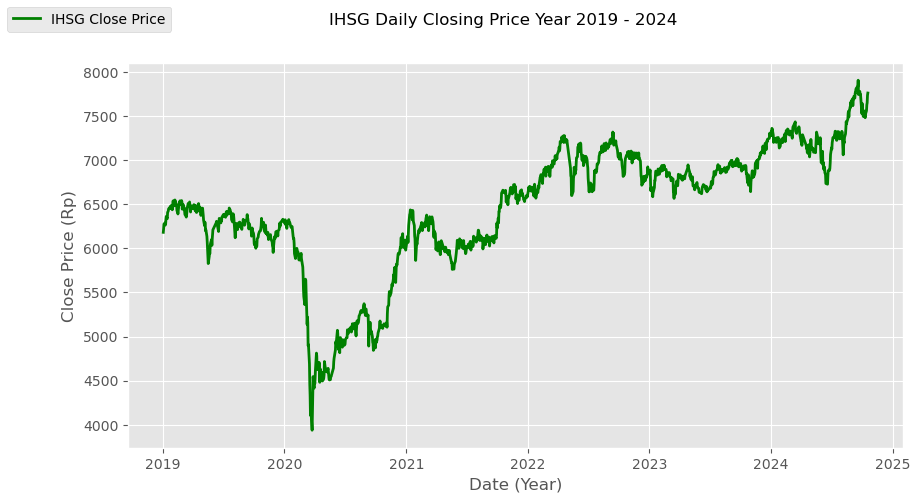

In [19]:
#Plot IHSG Closing Price and volume traded to view it's trend

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ihsg_data.index, ihsg_data['Close'], color="green", linewidth=2, label='IHSG Close Price')
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Close Price (Rp)')

fig.suptitle("IHSG Daily Closing Price Year 2019 - 2024")
fig.legend(loc='upper left')

<b> IHSG Daily Closing Price Year 2019 - 2024 </b>  
From the graph above, we could see that the IHSG closing price experienced a significant drop during the beginning of 2020. This occurance happens the same time Indonesia received its first Covid-19 patient, which was during March 2020. However, the volume traded was not that big. We can see that before the drop of the price, the volume traded had a significant drop during the end of 2019, when the world received the first Covid-19 patient and several countries has gone lockdown. This shows a correlation between the stock market and the market activities or condition. Let's take a closer look!

In [21]:
pysqldf("""
select Date, Close, CloseChanges
from ihsg_data
where CloseChanges not null
order by Close
limit 1""")

,Date,Close,CloseChanges
0,2020-03-24 00:00:00.000000,3937.63208,-0.013005


The Lowest Low Closing Price during these 5 years period happened on March 24th, 2020.

In [23]:
pysqldf("""
select Date, Close, CloseChanges
from ihsg_data
where CloseChanges not null
order by Close desc
limit 1""")

,Date,Close,CloseChanges
0,2024-09-19 00:00:00.000000,7905.390137,0.00974


The Highest High Closing Price during these 5 years period happened on September 9th, 2024. This highest high indicates that the IHSG number is growing strongly for the past year.

### IHSG and Percentage Change

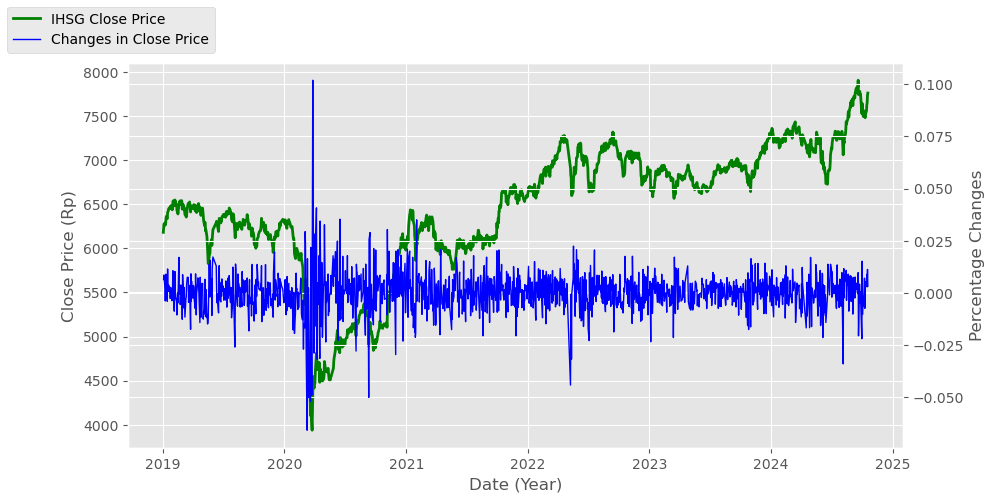

In [26]:
#Plot IHSG and its percentage change

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(ihsg_data.index, ihsg_data['Close'], color="green", linewidth=2, label='IHSG Close Price')
ax1.set_xlabel('Date (Year)')
ax1.set_ylabel('Close Price (Rp)')

ax2 = ax1.twinx()
ax2.plot(ihsg_data.index, ihsg_data['CloseChanges'], color="blue", linewidth=1, label='Changes in Close Price')
ax2.set_ylabel('Percentage Changes')

fig.legend(loc='upper left')

<b>IHSG Closing Price and Daily Percentage Change</b>  
We see the percentage changes are mostly stable around -2.5% and 2.5%. However, we can see there's a big spike reaching 10% and a big slope reaching -6%. Let's see when did these maximas occured during this period! We'll use SQL for this task.

In [28]:
#Get the biggest positive percentage change
pysqldf("""
select Date, Close, CloseChanges
from ihsg_data
where CloseChanges not null
order by CloseChanges desc
limit 1""")

,Date,Close,CloseChanges
0,2020-03-26 00:00:00.000000,4338.903809,0.101907


In [29]:
#Get the biggest negative percentage change
pysqldf("""
select Date, Close, CloseChanges
from ihsg_data
where CloseChanges not null
and CloseChanges < 0
order by CloseChanges
limit 1""")

,Date,Close,CloseChanges
0,2020-03-09 00:00:00.000000,5136.809082,-0.065787


The biggest positive percentage change in IHSG happened on March 26th, 2020 on 10.19%. While, the biggest negative percentage change in IHSG happened on <b>March 9th, 2020</b> on -6.58%.

<b>Monthly Movement</b>  
Daily movement is not very readable. To get a better understanding, let's view it by month.

In [32]:
ihsg_data['year'] = pd.to_datetime(ihsg_data.index).year
ihsg_data['month'] = pd.to_datetime(ihsg_data.index).month

In [33]:
ihsg_monthly = ihsg_data.copy()
ihsg_monthly = ihsg_monthly.groupby(['year', 'month']).mean()
datetime_index = pd.to_datetime([f'{year}-{month}' for year, month in ihsg_monthly.index])
ihsg_monthly = ihsg_monthly.set_index(datetime_index)
ihsg_monthly.index.name = "Date"

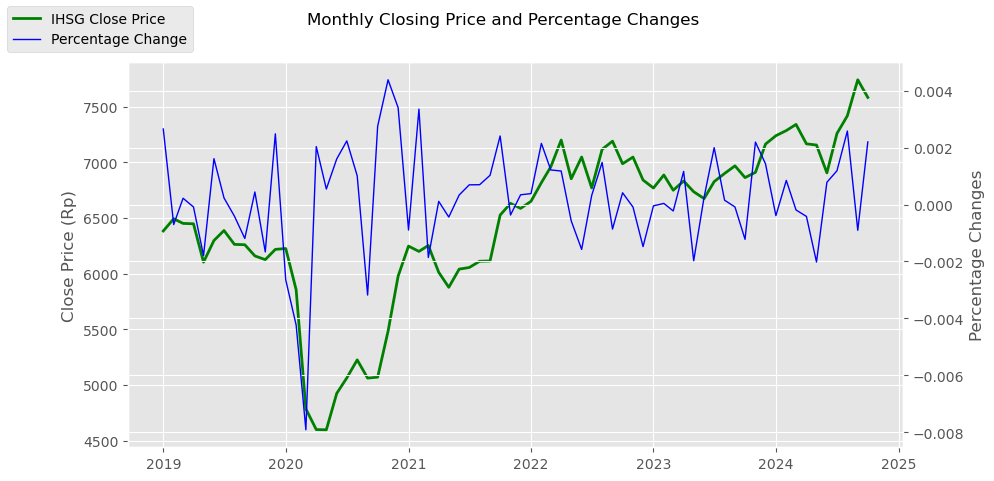

In [34]:
#Plot Monthly IHSG
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(ihsg_monthly.index, ihsg_monthly['Close'], color="green", linewidth=2, label='IHSG Close Price')
ax1.set_ylabel('Close Price (Rp)')

ax2 = ax1.twinx()
ax2.plot(ihsg_monthly.index, ihsg_monthly['CloseChanges'], color="blue", linewidth=1, label='Percentage Change')
ax2.set_ylabel('Percentage Changes')

fig.suptitle('Monthly Closing Price and Percentage Changes')
fig.legend(loc='upper left')

In [35]:
from datetime import datetime


In [36]:
#Get the biggest positive percentage change
max_pct_monthly = pysqldf("""
select *
from ihsg_monthly
where CloseChanges not null
order by CloseChanges desc
limit 1""")

print(f"The biggest positive percentage change happened on {pd.to_datetime(max_pct_monthly['Date'].values).strftime("%B %d, %Y").values} with percentage change reaching {np.round(max_pct_monthly['CloseChanges'].values, 4)} and Close Price at {np.round(max_pct_monthly['Close'].values)}")

The biggest positive percentage change happened on ['November 01, 2020'] with percentage change reaching [0.0044] and Close Price at [5484.]


In [37]:
#Get the biggest negative percentage change
min_pct_monthly = pysqldf("""
select *
from ihsg_monthly
where CloseChanges not null
and CloseChanges < 0
order by CloseChanges
limit 1""")

print(f"The biggest negative percentage change happened on {pd.to_datetime(min_pct_monthly['Date'].values).strftime("%B %d, %Y").values} with percentage change reaching {np.round(min_pct_monthly['CloseChanges'].values, 4)} and Close Price at {np.round(min_pct_monthly['Close'].values)}")

The biggest negative percentage change happened on ['March 01, 2020'] with percentage change reaching [-0.0079] and Close Price at [4787.]


On monthly data, the biggest positive increase in IHSG happened on November 2020, while the biggest negative percentage change in IHSG happened on March 2020. 

<b>March 2020 Plot</b>  
Since March 2020 seem to have the biggest drop and increase than any other period by daily, we will look deeper into it!

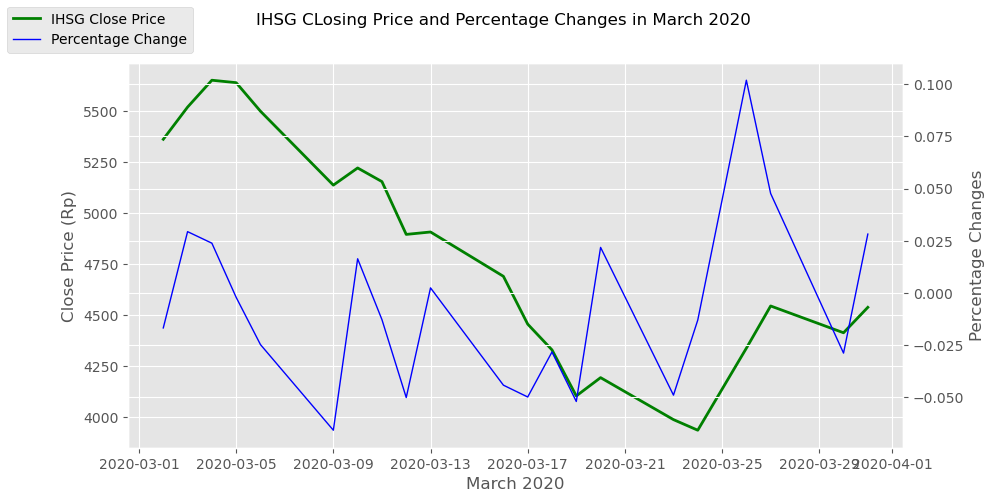

In [40]:
#Plot March 2020 Data
ihsg_mar2020 = ihsg_data[(ihsg_data.index.month == 3) & (ihsg_data.index.year == 2020)]

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(ihsg_mar2020.index, ihsg_mar2020['Close'], color="green", linewidth=2, label='IHSG Close Price')
ax1.set_xlabel('March 2020')
ax1.set_ylabel('Close Price (Rp)')

ax2 = ax1.twinx()
ax2.plot(ihsg_mar2020.index, ihsg_mar2020['CloseChanges'], color="blue", linewidth=1, label='Percentage Change')
ax2.set_ylabel('Percentage Changes')

fig.suptitle("IHSG CLosing Price and Percentage Changes in March 2020")
fig.legend(loc='upper left')

<b>March 2020 Analysis</b>  
On March 9th, the cases of COVID-19 began to spur in Indonesia, even though the numbers are still low, people became uncertain with the situation and possibly keeping their cash for emergencies. Foreign investors are also taking their investments out of Indonesia.

### Monthly Trend by Year

Now, we are going to find out trends of IHSG closing price in each year. To do this, we will group IHSG into each year and plot them accordingly for daily and monthly. 

#### Daily Yearly Trend

In [45]:
for year in ihsg_data['year'].unique():
    globals()[f"ihsg_data_{year}"] = ihsg_data[ihsg_data['year'] == year]
    print(f"The shape for IHSG data year {year}: ", globals()[f"ihsg_data_{year}"].shape)

The shape for IHSG data year 2019:  (245, 10)
The shape for IHSG data year 2020:  (242, 10)
The shape for IHSG data year 2021:  (247, 10)
The shape for IHSG data year 2022:  (246, 10)
The shape for IHSG data year 2023:  (239, 10)
The shape for IHSG data year 2024:  (189, 10)


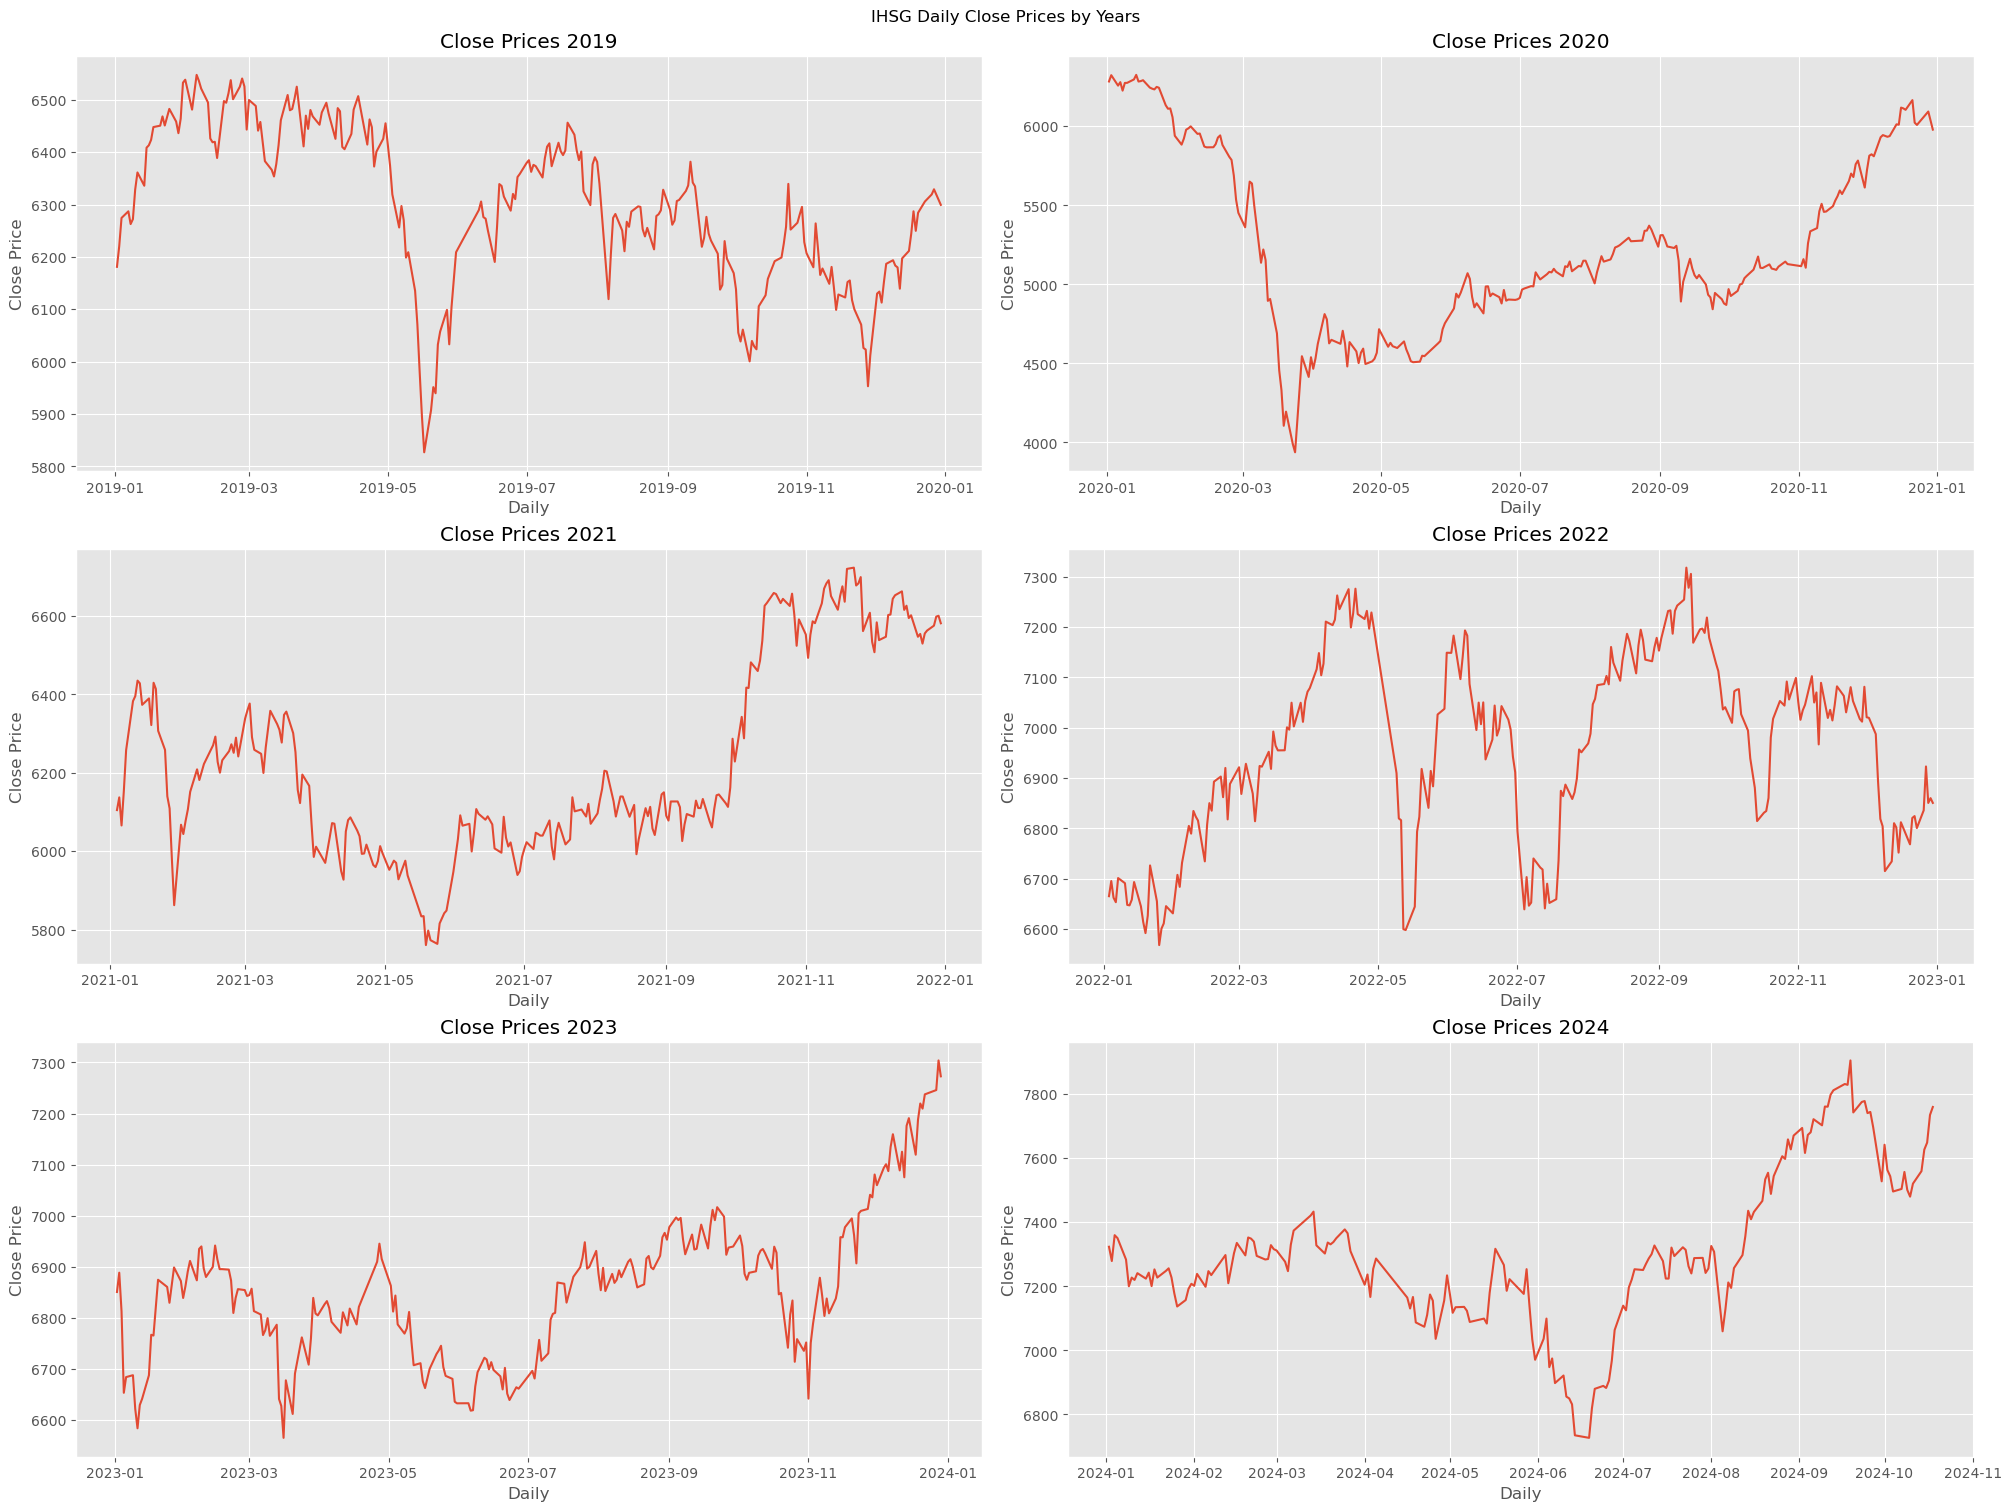

In [46]:
import matplotlib.dates as mdates
fig, axs = plt.subplots(3, 2, figsize = (20, 15), layout="constrained")
fig.suptitle("IHSG Daily Close Prices by Years")

year = 2019

for row in range(3):
    for col in range(2):
        ihsg_data_x = globals()[f'ihsg_data_{year}']
        axs[row, col].plot(ihsg_data_x.index, ihsg_data_x["Close"])
        axs[row, col].set_title(f'Close Prices {year}')
        year += 1
for ax in axs.flat:
    ax.set(xlabel='Daily', ylabel='Close Price')

plt.show()

#### Monthly Trend by Year

In [48]:
for year in ihsg_data['year'].unique():
    ihsg_data_x = globals()[f'ihsg_data_{year}']
    ihsg_data_x = ihsg_data_x.groupby(['month']).mean()
    ihsg_data_x = ihsg_data_x.drop(columns=['year'])
    globals()[f'ihsg_data_{year}'] = ihsg_data_x

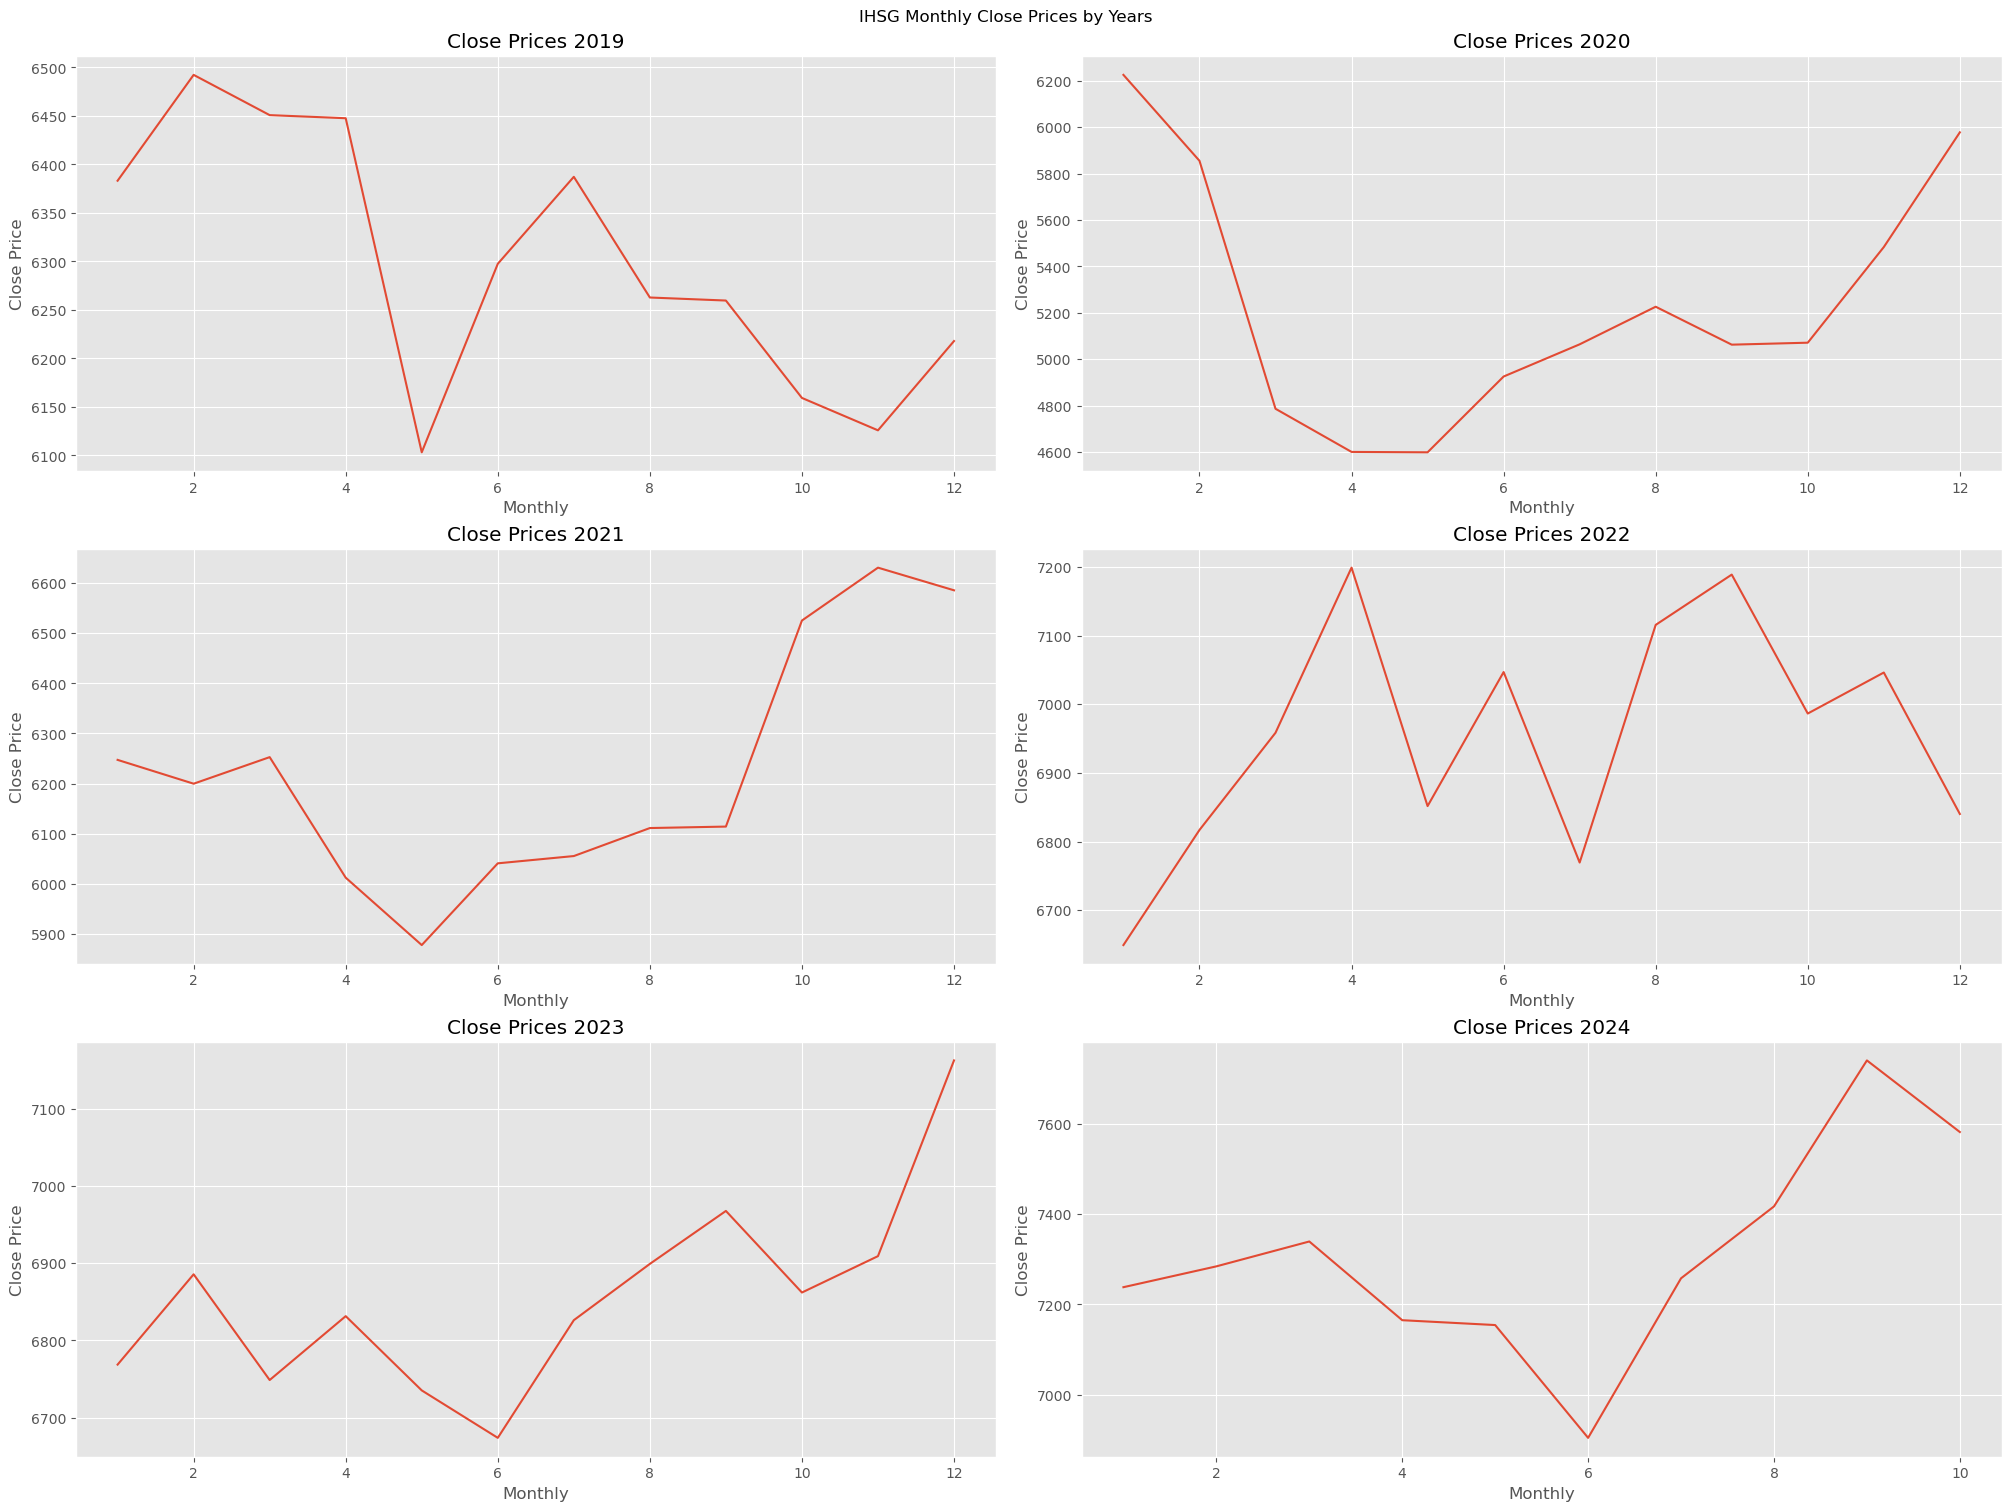

In [49]:
fig, axs = plt.subplots(3, 2, figsize = (20, 15), layout="constrained")
fig.suptitle("IHSG Monthly Close Prices by Years")

year = 2019

for row in range(3):
    for col in range(2):
        ihsg_data_x = globals()[f'ihsg_data_{year}']
        axs[row, col].plot(ihsg_data_x.index, ihsg_data_x["Close"])
        axs[row, col].set_title(f'Close Prices {year}')
        year += 1
for ax in axs.flat:
    ax.set(xlabel='Monthly', ylabel='Close Price')

plt.show()

From the yearly graph, we could see that there is a similar trends in each year, which is a decline around the second quarter (Month 4th and 6th). The first quarter normally shows an uptrend every year, except for the year 2020. This happens due to the outbreak of Covid-19, which led people to keep their cash in for emergencies and investors are in a wait-and-see state, since a crisis normally brings the economy down leading to high inflation. This crisis led to IHSG to reach an all time low for these periods of years, reaching (average) Rp4,600. Not too long, the market started to regain strength and recovers slowly, leading to an upward trend and reaching an all time high of (average) Rp7,700 on September 2024. 

## Merging External Data

From our EDA, it is proven that there are some cyclical trends in IHSG closing price. It also implies there are some external factors that affects the price of IHSG, one of which are world crisis, such as COVID-19. There are multiple researches that shows the Stock Index are affected by macroeconomics factors, both internal and external.  

Most researches suggests these macroeconomic variables to affect the IHSG Price:
- Internal factors: Exchange Rate, BI Rate, Inflation Rate
- External Factors: Dow Jones Index (DJIA), Straits times index (STI), Gold Price, and Crude Oil Prices.

In the next section, we will try to get these data to understand the movement of IHSG.

### USD Exchange Rate
The USD/IDR Exchange rate holds a significant factor, since it valuates the price of IDR towards USD. It is also a factor for foreign investor to valuate their investments in Indonesia. To get this data, we downloaded it through the BI Webpage: https://www.bi.go.id/id/statistik/informasi-kurs/transaksi-bi/Default.aspx

In [54]:
usd_kurs = pd.read_excel('kurs_transaksi_usd.xlsx')
usd_kurs = usd_kurs.drop(columns=['NO', 'Nilai'])

In [55]:
#The Date column is still an object, we should change that
usd_kurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kurs Jual  1425 non-null   float64
 1   Kurs Beli  1425 non-null   float64
 2   Tanggal    1425 non-null   object 
dtypes: float64(2), object(1)
memory usage: 33.5+ KB


In [56]:
#Rename Column name
usd_kurs.columns = ['Sell_Rate', 'Buy_Rate', 'Date']

In [57]:
usd_kurs['Date'] = pd.to_datetime(usd_kurs['Date'])
usd_kurs = usd_kurs.sort_values(by=['Date'], ascending=True)
usd_kurs = usd_kurs.set_index(['Date'])

In [58]:
usd_kurs

,Sell_Rate,Buy_Rate
Date,,
2019-01-02,14537.00,14393.00
2019-01-03,14546.00,14402.00
2019-01-04,14422.00,14278.00
2019-01-07,14176.00,14034.00
2019-01-08,14101.00,13961.00
...,...,...
2024-10-14,15687.05,15530.95
2024-10-15,15658.91,15503.09
2024-10-16,15632.77,15477.23


### Inflation Rate

In [60]:
inflation_rate = pd.read_excel("inflation_rate.xlsx", sheet_name="inflation_fix")
inflation_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       69 non-null     object 
 1   Inflation  69 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


The Date from Inflation Rate File is read as an object type. Let's change it into datetime.

In [62]:
inflation_rate['Date'] = pd.to_datetime(inflation_rate['Date'], format="%Y-%m-%d")
inflation_rate.info()

ValueError: time data "1 Sep 2024" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

### BI Rate

In [ ]:
bi_rate = pd.read_excel("bi_rate.xlsx", sheet_name="bi_rate")
bi_rate['Date'] = pd.to_datetime(bi_rate['Date'])

In [ ]:
bi_rate

### DWJIA

### STI

### Gold Price

In [ ]:
ihsg_data2 = ihsg_data.copy()
ihsg_data2.merge(usd_kurs, left_index=True, right_index=True)s

In [ ]:
import requests 
url = "https://www.bi.go.id/id/statistik/informasi-kurs/transaksi-bi/Default.aspx"
html_data = requests.get(url)

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data.content, "html.parser")

In [ ]:
table = soup.find_all("table")[1]
table